In [1]:
import pandas as pd
import numpy as np
import gzip, pickle, pickletools
import time

In [2]:
# Archivo donde se calcularon los pesos para cada prestamo

# Para colab
# df_prestamos = pd.read_json('/content/drive/MyDrive/UAQUE/TABLA_JOIN.json')

# Para local
df_prestamos = pd.read_json('../data/TABLA_JOIN.json')

In [3]:
df_temas = pd.read_json('../data/Libros.json')

# Funciones auxiliares

In [4]:
#Para obtener el nombre de un material a partir del título
def itemIdToMaterial(id):
    return df_prestamos.loc[df_prestamos['Llave_x'] == id]['Titulo'].unique()

In [5]:

def itemIdToDewey(id):
    return (df_prestamos.loc[df_prestamos['Llave_x'] == id]['Dewey'].unique())[0]

In [6]:
def itemIdToThemes(id):
    tematicas = df_temas.loc[df_temas['Llaves'] == str(id)]['Tema 670'].values
    if len(tematicas) == 0:
        return []
    else:
        return tematicas

In [7]:
# Función para obtener el diccionario de Deweys
import json
from collections import defaultdict

def getAllDeweys():
    with open('../data/deweys.json') as json_file:
        data = json.load(json_file)
    return defaultdict(list, data)

In [8]:
# Función para obtener el diccionario de Años de publicación
import json
from collections import defaultdict

def getAllPublishedYears():
    with open('../data/years.json') as json_file:
        data = json.load(json_file)
    return defaultdict(int, data)

In [9]:
# Función para obtener el diccionario de temáticas
import json
from collections import defaultdict

def getAllThemes():
    with open('../data/themes.json') as json_file:
        data = json.load(json_file)
    return defaultdict(list, data)

In [10]:

def generateClusterInfo(cluster_eval):
    dfP = df_pesos_cluster_temas.copy()
    user_p = dfP.loc[dfP['cluster'] == cluster_eval]
    tematicas =[]
    for llave in user_p['Llaves'].unique():
        tematicas.append(itemIdToThemes((llave)))

    user_p['Tematicas'] = tematicas
    display(user_p)
    deweys = ((dfP.loc[dfP['cluster'] == cluster_eval]['Dewey'].unique()))
    print((dfP.loc[dfP['cluster'] == cluster_eval]['Dewey'].unique()))

    tematicas = []
    for tems in user_p['Tematicas']:
        for tema in tems:
            for temasub in tema:
                if temasub in tematicas:
                    continue
                else:
                    tematicas.append(temasub)

    return user_p, deweys, set(tematicas)

In [11]:
def generateRecsInfopreds(preds):
    recs = preds
    data_recs_asr = []
    for ids in recs:
        data_recs_asr.append({'Titulo':itemIdToMaterial(ids), 
                         #'Rating':ratings[1], 
                          'Dewey':itemIdToDewey(ids), 
                         'Tematicas':itemIdToThemes(ids),
                          'Llave': ids})

    df_recs_asr = pd.DataFrame(data_recs_asr)
    display(df_recs_asr)
    deweys = print((df_recs_asr['Dewey'].unique()))
    print((df_recs_asr['Dewey'].unique()))

    tematicas = []
    for tems in df_recs_asr['Tematicas']:
        for tema in tems:
            for temasub in tema:
                if temasub in tematicas:
                    continue
                else:
                    tematicas.append(temasub)

    return df_recs_asr, deweys, set(tematicas)

In [12]:
def loadSimilarities():
    return np.load('similarities_rec.npy')

In [13]:
import sys
sys.path.append('./')

In [14]:
from sar_recommeder import SarRecommeder

/anaconda/envs/reco_gpu/lib/python3.7/site-packages/papermill/iorw.py:50: FutureWarning: pyarrow.HadoopFileSystem is deprecated as of 2.0.0, please use pyarrow.fs.HadoopFileSystem instead.
  from pyarrow import HadoopFileSystem


In [15]:
df_pesos_cluster_temas = pd.read_json('../data/pesos_cluster_temas.json')

In [16]:
df_pesos_cluster_deweys = pd.read_json('../data/pesos_cluster_deweys.json')

# SAR Clusters Temáticas

In [17]:
sar_predictor_temas = SarRecommeder(df_pesos_cluster_temas, n=100000)

In [18]:
# Entrenando modelo
sar_predictor_temas.fit()

2021-09-30 14:49:17,991 INFO     Collecting user affinity matrix
2021-09-30 14:49:17,995 INFO     Calculating time-decayed affinities
2021-09-30 14:49:18,190 INFO     Creating index columns
2021-09-30 14:49:18,279 INFO     Calculating normalization factors
2021-09-30 14:49:18,321 INFO     Building user affinity sparse matrix
2021-09-30 14:49:18,328 INFO     Calculating item co-occurrence
2021-09-30 14:49:46,348 INFO     Calculating item similarity
2021-09-30 14:49:46,349 INFO     Using jaccard based similarity
2021-09-30 14:50:48,079 INFO     Done training


In [19]:
# Obteniendo Predicciones
top_k_temas = sar_predictor_temas.predict()

2021-09-30 14:50:48,086 INFO     Calculating recommendation scores


In [20]:
# sar_predictor_temas
#sar_predictor_temas.evaluate_model(top_k_temas)

In [21]:
# Prediciendo para un usuario 
cluster_eval = 92
preds_temas = sar_predictor_temas.predict_for_cluster(cluster=cluster_eval)

In [22]:
# Info cluster
generateClusterInfo(cluster_eval)

/anaconda/envs/reco_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Llaves,cluster,Dewey,Peso del prestamos,timestamp,Tematicas
1692,255776,92,190,0.250,2018-08-03,[]
1695,255779,92,190,0.250,2019-03-19,"[[filosofía, francés]]"
1701,255783,92,800,0.250,2019-02-13,"[[literatura, moral]]"
1850,256000,92,190,0.125,2019-05-22,"[[filosofía, alemán], [filosofía, alemán]]"
1864,256034,92,130,0.125,2018-11-08,[]
...,...,...,...,...,...,...
179612,885340,92,840,1.000,2019-11-19,"[[poesía, francés]]"
179635,885617,92,840,0.500,2019-01-21,"[[cuento, francés]]"
182378,908913,92,270,0.250,2019-01-21,"[[cristianismo, historia]]"
183156,915537,92,110,0.750,2019-02-06,"[[filosofía, naturaleza]]"


['190' '800' '130' '880' '740' '110' '140' '180' '840' '260' '710' '810'
 '720' '860' '330' '920' '400' '750' '150' '890' '370' '820' '300' '320'
 '780' '170' '520' '590' '20' '500' '120' '830' '0' '460' 'Video' '700'
 '570' '900' '580' '850' '440' '270' '340' '610' '980']


In [23]:
# Info Recomendaciones
generateRecsInfopreds(preds_temas)

,Titulo,Dewey,Tematicas,Llave
0,[Entre nosotros ensayos para pensar en otro Em...,190,"[[filosofía, francés]]",341300
1,[La filosofía de Martín Heidegger Alfonso de W...,190,"[[filosofía, alemán]]",271907
2,"[Deleuze, Whitehead, Bergson rhizomatic connec...",190,"[[filosofía, francés]]",795173
3,[Deshoras Julio Cortázar],860,"[[cuento, argentino]]",678233
4,[Rizoma introducción Gilles Deleuze y Pierre F...,190,"[[filosofía, francés]]",341323
5,[Memorias del subsuelo Fédor Mikhailovitch Dos...,890,"[[novela, ruso]]",725775
6,[Compendio de psicología William James],150,[[psicología]],330489
7,"[Obras filosoficas Discurso del metodo, Tratad...",190,"[[filosofía, francés]]",272620
8,[Gilles Deleuze Claire Colebrook],190,"[[filosofía, francés]]",797150
9,"[El multiculturalismo y ""la política del recon...",300,[[multiculturalismo]],347754


['190' '860' '890' '150' '300']


In [24]:
# Exportando el modelo
#sar_predictor_temas.export_model()

In [25]:
# now_time = time.strftime("%m%d%H%m")
# filepath = "../Models/sar_trained_model_"+str(100)+"k_"+now_time+".pkl"
# with gzip.open(filepath, "wb") as f:
#     pickled = pickle.dumps(sar_predictor_temas.model, protocol=4)
#     optimized_pickle = pickletools.optimize(pickled)
#     f.write(optimized_pickle)

# SAR Clusters Deweys

In [26]:
#sar_predictor_deweys = SarRecommeder(df_pesos_cluster_deweys, n=100000)

In [27]:
#len(sar_predictor_deweys.train)

In [28]:
# Entrenando modelo
#sar_predictor_deweys.fit()

In [29]:
# Obteniendo Predicciones
#top_k_deweys = sar_predictor_deweys.predict()

In [30]:
# sar_predictor_temas
#sar_predictor_deweys.evaluate_model(top_k_deweys)

In [31]:
# Prediciendo para un usuario 
#cluster_eval = 92
#preds_temas = sar_predictor_deweys.predict_for_cluster(cluster=cluster_eval)

In [32]:
# Info cluster
#generateClusterInfo(cluster_eval)

In [33]:
# Info Recomendaciones
#generateRecsInfopreds(preds_temas)

In [34]:
# Exportando el modelo
#sar_predictor_deweys.export_model()

# Content based KNN Clusters Temáticas

In [35]:
from content_knn_recommender import ContentKNNRecommender

In [36]:
content_predictor_temas = ContentKNNRecommender(df_pesos_cluster_temas, n=100000, scale=5)

In [ ]:
content_predictor_temas.fit_evaluate()

In [ ]:
# Prediciendo para un usuario 
cluster_eval = 92
preds_temas_cb = content_predictor_temas.predict_for_cluster(cluster=cluster_eval)

In [ ]:
# Info cluster
generateClusterInfo(cluster_eval)

In [ ]:
# Info Recomendaciones
generateRecsInfopreds(preds_temas_cb)

# Content bases KNN Clusters Deweys

In [ ]:
#content_predictor_deweys = ContentKNNRecommender(df_pesos_cluster_deweys, n=80000, scale=5)

In [ ]:
# content_predictor_deweys.fit_evaluate()

In [ ]:
# Prediciendo para un usuario 
# cluster_eval = 92
# preds_deweys_cb = content_predictor_deweys.predict_for_cluster(cluster=cluster_eval)

In [ ]:
# Info cluster
# generateClusterInfo(cluster_eval)

In [ ]:
# Info Recomendaciones
# preds_tems_cb = ['30225']
# generateRecsInfopreds(preds_tems_cb)

# RBM Temáticas

In [17]:
from rbm_recommender import RBMRecommender

In [18]:
rbm_predictor_temas = RBMRecommender(df_pesos_cluster_temas.copy())

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0001:00:00.0, compute capability: 3.7

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0001:00:00.0, compute capability: 3.7
TensorSliceDataset: (TensorSliceDataset): /job:localhost/replica:0/task:0/device:CPU:0
seed2/Equal: (Equal): /job:localhost/replica:0/task:0/device:GPU:0
seed2/Equal_1: (Equal): /job:localhost/replica:0/task:0/device:GPU:0
seed2/LogicalAnd: (LogicalAnd): /job:localhost/replica:0/task:0/device:GPU:0
seed2: (Select): /job:localhost/replica:0/task:0/device:GPU:0
ShuffleDataset: (ShuffleDataset): /job:localhost/repl

2021-09-30 15:31:33.699129: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-09-30 15:31:33.704488: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2596990000 Hz
2021-09-30 15:31:33.705283: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55c76a86d240 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-09-30 15:31:33.705307: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-09-30 15:31:33.707376: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-09-30 15:31:33.838517: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55c769f92fe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2021-09-30 15:31:33.838557: I tensorflow/compiler/xla/s

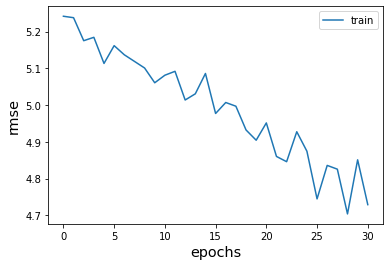

In [19]:
rbm_predictor_temas.fit()

In [20]:
rbm_predictor_temas.predict()

2021-09-30 15:31:44.015134: I tensorflow/core/common_runtime/placer.cc:54] TensorSliceDataset: (TensorSliceDataset): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-30 15:31:44.015197: I tensorflow/core/common_runtime/placer.cc:54] seed2/Equal: (Equal): /job:localhost/replica:0/task:0/device:GPU:0
2021-09-30 15:31:44.015209: I tensorflow/core/common_runtime/placer.cc:54] seed2/Equal_1: (Equal): /job:localhost/replica:0/task:0/device:GPU:0
2021-09-30 15:31:44.015218: I tensorflow/core/common_runtime/placer.cc:54] seed2/LogicalAnd: (LogicalAnd): /job:localhost/replica:0/task:0/device:GPU:0
2021-09-30 15:31:44.015226: I tensorflow/core/common_runtime/placer.cc:54] seed2: (Select): /job:localhost/replica:0/task:0/device:GPU:0
2021-09-30 15:31:44.015233: I tensorflow/core/common_runtime/placer.cc:54] ShuffleDataset: (ShuffleDataset): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-30 15:31:44.015239: I tensorflow/core/common_runtime/placer.cc:54] BatchDatasetV2: (BatchDatasetV2): 


gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_1: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_2: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_3: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_4: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_5: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_6: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_7: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_u

In [22]:
# Prediciendo para un usuario 
cluster_eval = 92
preds_temas_rbm = rbm_predictor_temas.predict_for_cluster(cluster=cluster_eval)

In [65]:
# Info cluster
df_info_clus, df_clus_deweys, df_clus_tems = generateClusterInfo(cluster_eval)

/anaconda/envs/reco_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Llaves,cluster,Dewey,Peso del prestamos,timestamp,Tematicas
1692,255776,92,190,0.250,2018-08-03,[]
1695,255779,92,190,0.250,2019-03-19,"[[filosofía, francés]]"
1701,255783,92,800,0.250,2019-02-13,"[[literatura, moral]]"
1850,256000,92,190,0.125,2019-05-22,"[[filosofía, alemán], [filosofía, alemán]]"
1864,256034,92,130,0.125,2018-11-08,[]
...,...,...,...,...,...,...
179612,885340,92,840,1.000,2019-11-19,"[[poesía, francés]]"
179635,885617,92,840,0.500,2019-01-21,"[[cuento, francés]]"
182378,908913,92,270,0.250,2019-01-21,"[[cristianismo, historia]]"
183156,915537,92,110,0.750,2019-02-06,"[[filosofía, naturaleza]]"


['190' '800' '130' '880' '740' '110' '140' '180' '840' '260' '710' '810'
 '720' '860' '330' '920' '400' '750' '150' '890' '370' '820' '300' '320'
 '780' '170' '520' '590' '20' '500' '120' '830' '0' '460' 'Video' '700'
 '570' '900' '580' '850' '440' '270' '340' '610' '980']


In [66]:
# Info Recomendaciones
df_info_pred_rbm_temas, df_pred_rbm_temas_deweys, df_pred_rbm_temas_tems = generateRecsInfopreds(preds_temas_rbm)

,Titulo,Dewey,Tematicas,Llave
0,[Arquitectura y cultura en Colombia Alberto Sa...,720,"[[cultura, colombiano]]",283894
1,"[Doctrina social de la iglesia, hoy Roger Veke...",260,[],339598
2,[Los Borgia la primera gran familia del crimen...,810,"[[novela, estadounidense]]",547000
3,[Curso completo de lengua italiana segun el me...,450,[[none]],275641
4,[Fisiología humana Por Bernardo A. Houssay],610,[[fisiología]],259949
5,[Ganteya Bain el pueblo Siona del rio Putumayo...,490,"[[siona, diccionario, espanol], [siona, diccio...",341115
6,[Zonificación ambiental de una cuenca hidrográ...,330,[],848265
7,[Estadistica descriptiva texto programado Lass...,310,[[estadístico]],298813
8,[Historia general de México Bernardo García Ma...,970,[[none]],689532
9,[Roland Barthes 1915-1980 [biografia] Louis-Je...,920,"[[amor, filosofía]]",718058


['720' '260' '810' '450' '610' '490' '330' '310' '970' '920']
['720' '260' '810' '450' '610' '490' '330' '310' '970' '920']


In [67]:
intersection = df_clus_tems & df_pred_rbm_temas_tems
intersection

{'colombiano', 'diccionario', 'estadounidense', 'filosofía', 'none', 'novela'}

In [68]:
difference = df_pred_rbm_temas_tems - df_clus_tems
difference

{'amor', 'cultura', 'espanol', 'estadístico', 'fisiología', 'siona'}

# RBM Deweys

In [27]:
rbm_predictor_deweys = RBMRecommender(df_pesos_cluster_deweys.copy())

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0001:00:00.0, compute capability: 3.7

task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_3: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_4: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_5: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_6: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_7: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_8: (Const): /job:localhost/rep

2021-09-30 15:37:32.351895: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0001:00:00.0
2021-09-30 15:37:32.351995: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2021-09-30 15:37:32.352023: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2021-09-30 15:37:32.352046: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0
2021-09-30 15:37:32.352069: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10.0
2021-09-30 15:37:32.352091: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10.0
2021-09-30 15:37:32.352113: I tensorflow/stream_executor/platform

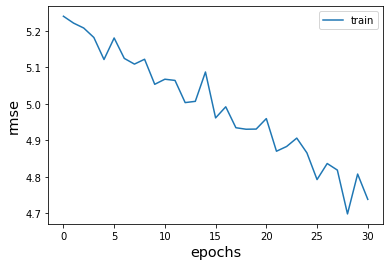

In [28]:
rbm_predictor_deweys.fit()

In [29]:
rbm_predictor_deweys.predict()

2021-09-30 15:37:41.982173: I tensorflow/core/common_runtime/placer.cc:54] TensorSliceDataset: (TensorSliceDataset): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-30 15:37:41.982237: I tensorflow/core/common_runtime/placer.cc:54] seed2/Equal: (Equal): /job:localhost/replica:0/task:0/device:GPU:0
2021-09-30 15:37:41.982263: I tensorflow/core/common_runtime/placer.cc:54] seed2/Equal_1: (Equal): /job:localhost/replica:0/task:0/device:GPU:0
2021-09-30 15:37:41.982273: I tensorflow/core/common_runtime/placer.cc:54] seed2/LogicalAnd: (LogicalAnd): /job:localhost/replica:0/task:0/device:GPU:0
2021-09-30 15:37:41.982282: I tensorflow/core/common_runtime/placer.cc:54] seed2: (Select): /job:localhost/replica:0/task:0/device:GPU:0
2021-09-30 15:37:41.982289: I tensorflow/core/common_runtime/placer.cc:54] ShuffleDataset: (ShuffleDataset): /job:localhost/replica:0/task:0/device:CPU:0
2021-09-30 15:37:41.982295: I tensorflow/core/common_runtime/placer.cc:54] BatchDatasetV2: (BatchDatasetV2): 

ce:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_7: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_8: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_9: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Sum/reduction_indices: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/transpose_1/perm: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_10: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/ArgMax/dimension: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/add_1/y: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_

In [30]:
# Prediciendo para un usuario 
cluster_eval = 92
preds_deweys_rbm = rbm_predictor_deweys.predict_for_cluster(cluster=cluster_eval)

In [50]:
# Info cluster
df_info_clus, df_clus_deweys, df_clus_tems = generateClusterInfo(cluster_eval)

/anaconda/envs/reco_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Llaves,cluster,Dewey,Peso del prestamos,timestamp,Tematicas
1692,255776,92,190,0.250,2018-08-03,[]
1695,255779,92,190,0.250,2019-03-19,"[[filosofía, francés]]"
1701,255783,92,800,0.250,2019-02-13,"[[literatura, moral]]"
1850,256000,92,190,0.125,2019-05-22,"[[filosofía, alemán], [filosofía, alemán]]"
1864,256034,92,130,0.125,2018-11-08,[]
...,...,...,...,...,...,...
179612,885340,92,840,1.000,2019-11-19,"[[poesía, francés]]"
179635,885617,92,840,0.500,2019-01-21,"[[cuento, francés]]"
182378,908913,92,270,0.250,2019-01-21,"[[cristianismo, historia]]"
183156,915537,92,110,0.750,2019-02-06,"[[filosofía, naturaleza]]"


['190' '800' '130' '880' '740' '110' '140' '180' '840' '260' '710' '810'
 '720' '860' '330' '920' '400' '750' '150' '890' '370' '820' '300' '320'
 '780' '170' '520' '590' '20' '500' '120' '830' '0' '460' 'Video' '700'
 '570' '900' '580' '850' '440' '270' '340' '610' '980']


In [51]:
# Info Recomendaciones
df_info_pred_rbm_deweys, df_pred_rbm_deweys_deweys, df_pred_rbm_deweys_tems = generateRecsInfopreds(preds_deweys_rbm)

,Titulo,Dewey,Tematicas,Llave
0,[Arquitectura y cultura en Colombia Alberto Sa...,720,"[[cultura, colombiano]]",283894
1,[Los Borgia la primera gran familia del crimen...,810,"[[novela, estadounidense]]",547000
2,[Sounds intriguing resource material for teach...,420,"[[inglés, fonología]]",314926
3,[Teaching literature in the language classroom...,420,[],739712
4,[Ganteya Bain el pueblo Siona del rio Putumayo...,490,"[[siona, diccionario, espanol], [siona, diccio...",341115
5,[Zonificación ambiental de una cuenca hidrográ...,330,[],848265
6,[Derechos humanos en América Latina mundializa...,340,"[[derechos, humanos, aspecto, jurídico, améric...",809991
7,[Estadistica descriptiva texto programado Lass...,310,[[estadístico]],298813
8,[Positioning the battle for your mind Al Ries ...,650,"[[posicionamiento, publicidad]]",540260
9,"[Estado, poder y neoliberalismo en Colombia an...",320,"[[democracia, colombia, siglo, xx]]",841320


['720' '810' '420' '490' '330' '340' '310' '650' '320']
['720' '810' '420' '490' '330' '340' '310' '650' '320']


In [63]:
intersection = df_clus_tems & df_pred_rbm_deweys_tems
intersection

{'aspecto',
 'colombia',
 'colombiano',
 'diccionario',
 'estadounidense',
 'inglés',
 'novela',
 'siglo',
 'xx'}

In [69]:
difference = df_pred_rbm_deweys_tems - df_clus_tems
difference

{'américa',
 'cultura',
 'democracia',
 'derechos',
 'espanol',
 'estadístico',
 'fonología',
 'humanos',
 'jurídico',
 'latina',
 'posicionamiento',
 'publicidad',
 'siona'}

# SVD

In [17]:
from svd_recommender import SVDRecommender

System version: 3.7.11 (default, Jul 27 2021, 14:32:16) 
[GCC 7.5.0]
Surprise version: 1.1.1


In [18]:
svd_predictor = SVDRecommender(df_pesos_cluster_temas.copy())

In [19]:
svd_predictor.fit()

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Took 21.370049186998585 seconds for training.


In [20]:
svd_predictor.predict()

Took 109.17373065300126 seconds for prediction.


In [21]:
# Prediciendo para un usuario 
cluster_eval = 92
preds_svd = svd_predictor.predict_for_cluster(cluster=cluster_eval)

In [22]:
df_info_clus, df_clus_deweys, df_clus_tems = generateClusterInfo(cluster_eval)

/anaconda/envs/reco_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Llaves,cluster,Dewey,Peso del prestamos,timestamp,Tematicas
1692,255776,92,190,0.250,2018-08-03,[]
1695,255779,92,190,0.250,2019-03-19,"[[filosofía, francés]]"
1701,255783,92,800,0.250,2019-02-13,"[[literatura, moral]]"
1850,256000,92,190,0.125,2019-05-22,"[[filosofía, alemán], [filosofía, alemán]]"
1864,256034,92,130,0.125,2018-11-08,[]
...,...,...,...,...,...,...
179612,885340,92,840,1.000,2019-11-19,"[[poesía, francés]]"
179635,885617,92,840,0.500,2019-01-21,"[[cuento, francés]]"
182378,908913,92,270,0.250,2019-01-21,"[[cristianismo, historia]]"
183156,915537,92,110,0.750,2019-02-06,"[[filosofía, naturaleza]]"


['190' '800' '130' '880' '740' '110' '140' '180' '840' '260' '710' '810'
 '720' '860' '330' '920' '400' '750' '150' '890' '370' '820' '300' '320'
 '780' '170' '520' '590' '20' '500' '120' '830' '0' '460' 'Video' '700'
 '570' '900' '580' '850' '440' '270' '340' '610' '980']


In [23]:
# Info Recomendaciones
df_info_pred_svd, df_pred_svd_deweys, df_pred_svd_tems = generateRecsInfopreds(preds_svd)

,Titulo,Dewey,Tematicas,Llave
0,[Neuroanatomía clínica Richard S. Snell],610,[[neuroanatomía]],801231
1,[Microbiología de las infecciones humanas edit...,610,"[[microbiología, médico]]",725351
2,[El embrujo de Shanghái Juan Marsé],860,"[[novela, español]]",855109
3,[New critical legal thinking law and the polit...,340,"[[estudio, crítico, derecho]]",861995
4,[Convivir con tu embarazo y con tu bebé Franci...,610,[],833865
5,[La evaluación de la acción y de las políticas...,350,"[[política, público, evaluación]]",718174
6,[Hacia una sociología del discurso pedagogico ...,370,[[sociolingüístico]],534834
7,[Las claves del ensayo Fernando Vásquez Rodríg...,800,"[[ensayo, técnico]]",918213
8,[Reglamento colombiano de construcción sismo r...,690,"[[construcción, antisísmica, norma, técnico], ...",919896
9,[Introducción a la macroeconomía colombiana Co...,330,"[[macroeconomía, colombia]]",345661


['610' '860' '340' '350' '370' '800' '690' '330']
['610' '860' '340' '350' '370' '800' '690' '330']


In [24]:
intersection = df_clus_tems & df_pred_svd_tems
intersection

{'colombia', 'crítico', 'ensayo', 'español', 'novela', 'técnico', 'ética'}

In [25]:
difference = df_pred_svd_tems - df_clus_tems
difference

{'antisísmica',
 'construcción',
 'derecho',
 'economía',
 'estudio',
 'evaluación',
 'macroeconomía',
 'microbiología',
 'médico',
 'neuroanatomía',
 'norma',
 'política',
 'público',
 'sociolingüístico'}

In [1]:
import os
os.system('jupyter nbconvert --to html recommenders.ipynb')

0